In [7]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dataset = pd.read_csv(r'C:\Users\Brian\Downloads\BostonHousing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
print(dataset.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [11]:
X = pd.DataFrame(dataset.iloc[:,:-1])
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [12]:
y = pd.DataFrame(dataset.iloc[:,:-1])
y

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [13]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

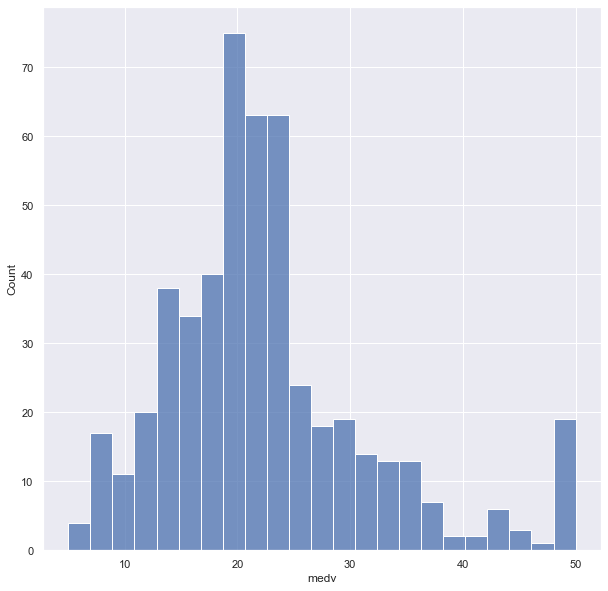

In [14]:
# 用seaborn設定圖表的美化格式，先設定圖表長寬
sns.set(rc={'figure.figsize':(10,10)})
# 使用的資料是房價
sns.histplot(dataset, x="medv")
plt.show()

<AxesSubplot:>

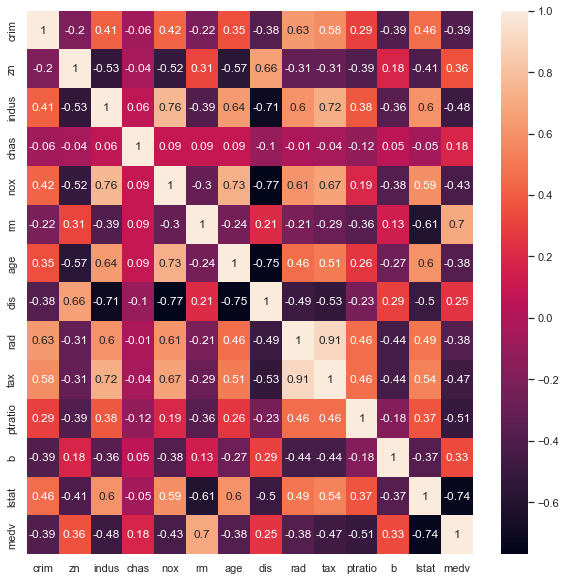

In [15]:
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)

In [16]:
# Import decision tree regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [17]:
X = dataset[['lstat']].values
y = dataset['medv'].values

In [18]:
# Sort X and y by ascending values of X
sort_idx = X.flatten().argsort()
X = X[sort_idx]
y = y[sort_idx]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
tree = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 3)
tree.fit(X,y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [20]:
tree.score(X_train, y_train)

0.692125612609745

In [21]:
tree.score(X_test, y_test)

0.7178912546703141

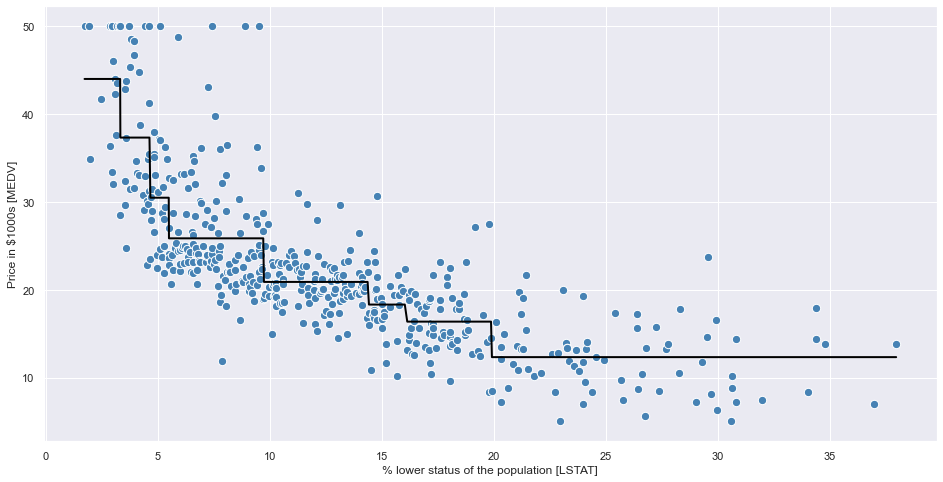

In [23]:
# Plot actual target against features
plt.figure(figsize = (16, 8))
plt.scatter(X, y, c='steelblue', edgecolor='white', s = 70)
# Plot predicted target against features
plt.plot(X, tree.predict(X), color = 'black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

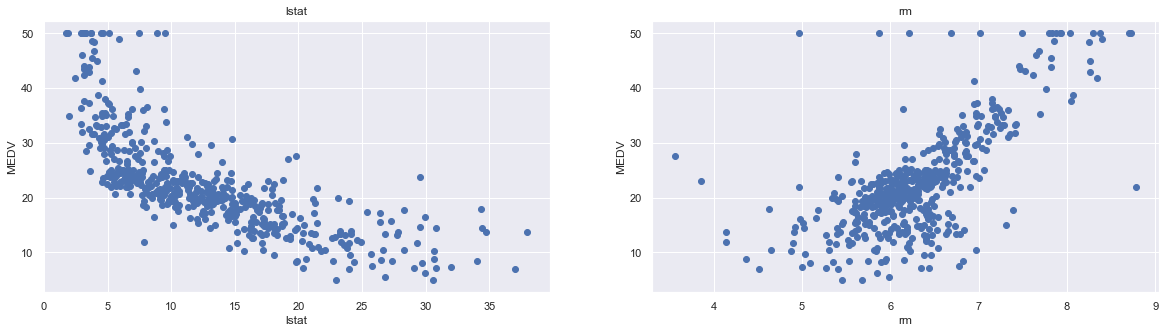

In [27]:
plt.figure(figsize=(20, 5))
features = ['lstat', 'rm']
target = dataset['medv']
for i, col in enumerate(features):
# 排版1 row, 2 columns, nth plot : 在jupyter notebook上兩張並排
    plt.subplot(1, len(features), i+1)
# add data column into plot
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [30]:
X = pd.DataFrame(np.c_[dataset['lstat'], dataset['rm']], columns = ['lstat', 'rm'])
Y = dataset['medv']

In [31]:
# train_test_spli
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
# 再用.shape看切出來的資料長相(列, 欄)
print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(404, 2)
(102, 2)
(404,)
(102,)


In [32]:
# Modeling
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 學習/訓練Fitting linear model
reg.fit(X_train,Y_train)
# 預測結果Predicting using the linear model
reg.predict(X_test)
# 真實結果 : Y_test
# 測試準確度
print('R2: ', reg.score(X_test, Y_test))

R2:  0.6628996975186953


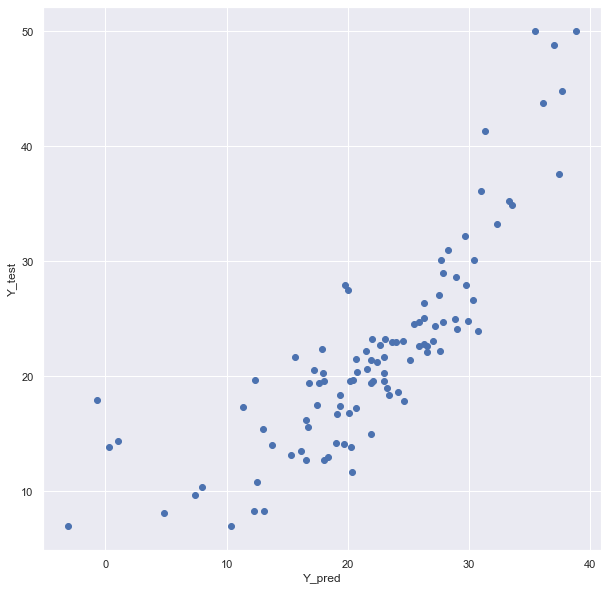

In [33]:
# plotting the y_test vs y_pred
Y_pred = reg.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

In [34]:
reg.intercept_

2.7362403426066138

In [36]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
lstat,-0.717230
rm,4.589388
